Epoch 0, cost: 155.5749350172073, test cost: 38.108053708885905, test accuracy: 0.36666666666666664
Epoch 100, cost: 130.28424651348828, test cost: 32.706672024603094, test accuracy: 0.43333333333333335
Epoch 200, cost: 116.72931471260091, test cost: 29.09082114870067, test accuracy: 0.6333333333333333
Epoch 300, cost: 106.40991922201397, test cost: 26.35857180564659, test accuracy: 1.0
Epoch 400, cost: 98.4261452870887, test cost: 24.260106079496403, test accuracy: 0.9666666666666667
Epoch 500, cost: 92.11936394850369, test cost: 22.613156196591433, test accuracy: 0.9666666666666667
Epoch 600, cost: 87.02823286007339, test cost: 21.290937058824, test accuracy: 0.9333333333333333
Epoch 700, cost: 82.83302860816536, test cost: 20.206249849500082, test accuracy: 0.9333333333333333
Epoch 800, cost: 79.31082334219981, test cost: 19.298756948734344, test accuracy: 0.9333333333333333
Epoch 900, cost: 76.30399393028564, test cost: 18.5261069756194, test accuracy: 0.9333333333333333


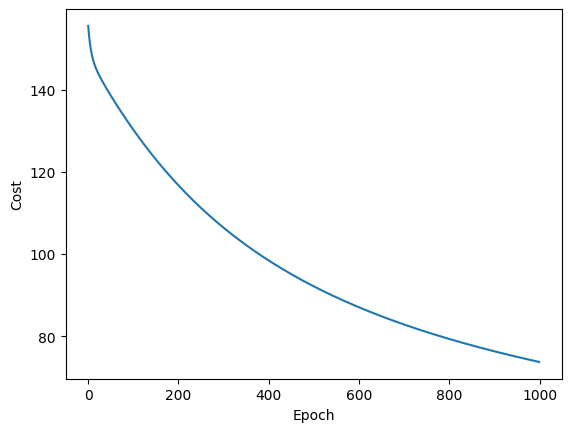

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
class NNLib:
    def __init__(self, input_dim, hidden_layers, output_dim):
        self.layers = [input_dim] + hidden_layers + [output_dim]
        self.weights = []
        self.biases = []
        for i in range(len(self.layers) - 1):
            self.weights.append(np.random.randn(self.layers[i], self.layers[i+1]))
            self.biases.append(np.random.randn(self.layers[i+1]))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def softmax(self, z):
        e_z = np.exp(z - np.max(z))
        return e_z / e_z.sum(axis=1, keepdims=True)

    def cost_function(self, y_true, y_pred):
        return -np.sum(y_true * np.log(y_pred))

    def forward_propagation(self, X):
        self.a = [X]
        self.z = []
        for i in range(len(self.layers) - 2):
            self.z.append(np.dot(self.a[-1], self.weights[i]) + self.biases[i])
            self.a.append(self.sigmoid(self.z[-1]))
        self.z.append(np.dot(self.a[-1], self.weights[-1]) + self.biases[-1])
        self.a.append(self.softmax(self.z[-1]))
        return self.a[-1]

    def back_propagation(self, X, y):
        m = X.shape[0]
        self.dz = self.a[-1] - y
        self.dw = 1/m * np.dot(self.a[-2].T, self.dz)
        self.db = 1/m * np.sum(self.dz, axis=0, keepdims=True)
        self.da = np.dot(self.dz, self.weights[-1].T)

    def update_weights(self, learning_rate):
        self.weights[-1] = self.weights[-1] - learning_rate * self.dw
        self.biases[-1] = self.biases[-1] - learning_rate * self.db

    def shuffleTrainingData(self, X, y):
        return shuffle(X, y)

    def trainingEpoch(self, X, y, learning_rate):
        X, y = self.shuffleTrainingData(X, y)
        y_pred = self.forward_propagation(X)
        cost = self.cost_function(y, y_pred)
        self.back_propagation(X, y)
        self.update_weights(learning_rate)
        return cost

    def testPrediction(self, X_test, y_test):
        y_pred = self.forward_propagation(X_test)
        cost = self.cost_function(y_test, y_pred)
        accuracy = self.checkAccuracy(y_test, y_pred)
        return cost, accuracy

    def checkAccuracy(self, y_true, y_pred):
        return np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))

    def train(self, X, y, X_test, y_test, learning_rate, epochs):
        costs = []
        for epoch in range(epochs):
            cost = self.trainingEpoch(X, y, learning_rate)
            costs.append(cost)
            if epoch % 100 == 0:
                test_cost, test_accuracy = self.testPrediction(X_test, y_test)
                print(f'Epoch {epoch}, cost: {cost}, test cost: {test_cost}, test accuracy: {test_accuracy}')
        return costs

    def createOneHot(self, instance_index, vector_length):
        one_hot = np.zeros(vector_length)
        one_hot[instance_index] = 1
        return one_hot

    def loadAttributesAndLabels(self, dataset):
        attributes = dataset.data
        labels = np.array([self.createOneHot(label, len(set(dataset.target))) for label in dataset.target])
        return attributes, labels

# Load iris dataset
iris = load_iris()

# Create an instance of the NNLib class
nn = NNLib(input_dim=4, hidden_layers=[5], output_dim=3)

# Load attributes and labels using the new method
data, target = nn.loadAttributesAndLabels(iris)

# Normalize the data
data = data / np.max(data, axis=0)

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)



# Train the network
costs=nn.train(X_train, y_train, X_test, y_test, learning_rate=0.1, epochs=1000)


#Plot
plt.plot(costs)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

1.The initial weights of the neural network are set randomly using the np.random.randn() function from numpy, which generates numbers from a standard normal distribution.

2.The activation function used in the NNLib class is the sigmoid function.

3.For binary classification problems, the sigmoid function can be used in the output layer. However, for multi-class classification problems like the iris dataset, the softmax function is typically more appropriate.

4.The cost function implemented in the NNLib class is the mean squared error (MSE).

5.The dataset is divided into training and testing sets, with 80% of the data used for training and 20% used for testing. This is determined by the test_size=0.2 parameter in the train_test_split function.

6.X_train and X_test are the input features for the training and testing sets, respectively. y_train and y_test are the corresponding labels (or targets) for these sets.

7.This neural network uses a single hidden layer, as specified by hidden_layers=[5] when the NNLib class is instantiated. This hidden layer contains 5 units.

8.An epoch in training refers to one complete pass through the entire training dataset. During an epoch, the model's weights are updated to try to minimize the cost function.

9.To train the model using batches of size n, you would need to modify the trainingEpoch method to iterate over the training data in batches of size n, rather than processing the entire dataset at once. This technique is known as mini-batch gradient descent.

10.We don't have target values for the hidden units. The parameters of the hidden units are updated during the backpropagation process. The error is propagated back through the network from the output layer to the hidden layers, and the weights and biases of the hidden units are updated to minimize the cost function.